> 
# Project 2: Responsibility for the Climate Crisis and Per-Capita Carbon Emissions

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

> **Responsibility for the Climate Crisis and Per-Capita Carbon Emissions **: In this report, I will be examining three Gapminder data sets investigating the responsibility for the climate crisis. The dependent variable will be per-capita carbon emissions, while the independent variables will be year, country, income and electricity usage per-capita. The questions this report will explore are as follows:
1) How are per capita carbon emissions related to income?
2) How have particular countries' carbon emissions changed over time?
3) How are carbon emissions per-capita trends likely to continue?


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

df_1 = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_2 = pd.read_csv('electricity_use_per_person.csv')
df_3 = pd.read_csv('co2_emissions_tonnes_per_person.csv')

<a id='wrangling'></a>
## Data Wrangling 

### General Properties

In [103]:
df_1.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [104]:
df_2.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1720.0,1220.0,1210.0,1620.0,1840.0,1940.0,2210.0,2120.0,2530.0,2310.0
1,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,887.0,859.0,891.0,944.0,863.0,1010.0,1120.0,1230.0,1270.0,1360.0
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,109.0,144.0,133.0,172.0,189.0,206.0,207.0,219.0,280.0,312.0
3,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2390.0,2360.0,2440.0,2750.0,2710.0,2850.0,2900.0,2970.0,2940.0,3050.0
4,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1520.0,1640.0,1770.0,1670.0,1660.0,1730.0,1810.0,1890.0,1930.0,1970.0


In [105]:
df_3.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0529,0.0637,0.0854,0.154,0.242,0.294,0.412,0.35,0.316,0.299
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.3800,1.2800,1.3000,1.460,1.480,1.560,1.790,1.68,1.730,1.960
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.2200,2.9900,3.1900,3.160,3.420,3.300,3.290,3.46,3.510,3.720
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.3000,6.7500,6.5200,6.430,6.120,6.120,5.870,5.92,5.900,5.830
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.9800,1.1000,1.2000,1.180,1.230,1.240,1.250,1.33,1.250,1.290


> The first data wrangling operation would be to get the data into discrete columns, or country, year, var.



In [106]:
df_1 =df_1.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="income_pp")
df_1.head(5)

,country,Year,income_pp
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618


In [107]:
df_2 =df_2.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="electricity_use_pp")
df_2.head(5)

,country,Year,electricity_use_pp
0,Albania,1960,NaN
1,Algeria,1960,NaN
2,Angola,1960,NaN
3,Argentina,1960,NaN
4,Armenia,1960,NaN


In [108]:
df_3 =df_3.melt(id_vars=["country"], 
        var_name="Year", 
        value_name="C02ems_pp")
df_3.head(5)

,country,Year,C02ems_pp
0,Afghanistan,1800,NaN
1,Albania,1800,NaN
2,Algeria,1800,NaN
3,Andorra,1800,NaN
4,Angola,1800,NaN


Next I will check the shape of the data before joining dataframes.

In [72]:
df_1.shape

(46513, 3)

In [73]:
df_2.shape

(7590, 3)

In [74]:
df_3.shape

(41280, 3)

So clearly df_2 is much smaller, reflecting the fact that universal access to electricity is a fairly recent phenomenon. Perhaps in connection to this greater access to electricity, 1960 onward marks the beginning of a period known as the great acceleration in which carbon emissions worldwide began to grow exponentially. Therefore, I will limit the other dataframes to the years 1960 - 2014.   


In [109]:
df_1b = df_1[(df_1['Year'] > '1959') & (df_3['Year'] <= '2014')]

In [110]:
df_3b = df_3[(df_3['Year'] > '1959') & (df_3['Year'] <= '2014')]

I will now combine these dfs into one.

In [111]:
df_merged = pd.merge(df_1b, df_2, how='inner', on=['Year', 'country'])
df_merged.head(5)

,country,Year,income_pp,electricity_use_pp
0,Albania,1960,2790,NaN
1,Algeria,1960,6520,NaN
2,Angola,1960,3860,NaN
3,Argentina,1960,9020,NaN
4,Armenia,1960,2520,NaN


In [112]:
df_merged = pd.merge(df_merged, df_3, how='inner', on=['Year', 'country'])

In [113]:
df_merged.info()
df = df_merged

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7435 entries, 0 to 7434
Data columns (total 5 columns):
country               7435 non-null object
Year                  7435 non-null object
income_pp             7435 non-null int64
electricity_use_pp    5591 non-null float64
C02ems_pp             7027 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 348.5+ KB


We can see above that year is an object and to use this effectively I will need to change this to to an integer.

In [114]:
df['Year'] = df['Year'].astype(int)

In [81]:
df.head(400)

,country,Year,income_pp,electricity_use_pp,C02ems_pp
0,Albania,1960,2790,NaN,1.2400
1,Algeria,1960,6520,NaN,0.5540
2,Angola,1960,3860,NaN,0.0975
3,Argentina,1960,9020,NaN,2.3700
4,Armenia,1960,2520,NaN,1.3500
5,Australia,1960,14300,1830.0,8.5700
6,Austria,1960,12100,1810.0,4.3600
7,Azerbaijan,1960,5080,NaN,6.2600
8,Bahrain,1960,22600,NaN,3.5400
9,Bangladesh,1960,1060,NaN,0.0459


In [115]:
df.isna().sum()

country                  0
Year                     0
income_pp                0
electricity_use_pp    1844
C02ems_pp              408
dtype: int64

In [116]:
df['C02ems_pp'].median()

2.9

Now I need to decide how to handle missing values. Applying the mean would not be appropriate as I am trying to see the differing responsibilities of each country and higher emitting countries would skew the results. This is also true to a lesser extent with the median as can be seen above.  

Also it seems that most of the NaNs for electricity_use_pp is in less developed countries. This is perhaps before they developed electricity networks. To a lesser extent, but still at the earlier period of the dataframe, are a more sporadic number of NaNs for C02ems_pp. I will assume that these observation are also missing due to a lack of development, and by implication significant C02ems_pp. Therefore, I will change the NaNs in these columns to 0 to reflect negliable carbon emissions per-capita and use of electricity.   

In [118]:
df.fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7435 entries, 0 to 7434
Data columns (total 5 columns):
country               7435 non-null object
Year                  7435 non-null int32
income_pp             7435 non-null int64
electricity_use_pp    7435 non-null float64
C02ems_pp             7435 non-null float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 319.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> Notes on variables:
Income is calcualted in dollars and adjusted for inflation.
Electricity usage per-person is calculated in Kilowatts hours.
Carbon dioxide emissions per person is calculated in tonnes per-year.

>The per-capita amount of each of these figures is worked out by dividing the total for the nation per-year for the unit divided by the population.



### Research Question 1 (How are per capita carbon emissions related to income?)

An initial eda step is to look across the data to see possible relationships. 

In [ ]:
plt.figure(figsize=(10,8), dpi= 40)
sns.pairplot(df, hue="emission_levels");

So the next thing to do would be to explore the dependent variable's statistics.

In [121]:
df['C02ems_pp'].describe()

count    7435.000000
mean        5.191505
std         8.050483
min         0.000000
25%         0.508000
50%         2.460000
75%         7.235000
max       101.000000
Name: C02ems_pp, dtype: float64

I will use these statistics to group countries into higher and lower emitters.

In [122]:
bin_edges = [0.0, 0.508, 2.460, 7.2350, 101.0]
bin_names = ['very_low', 'low', 'medium', 'high']
df['emission_levels'] = pd.cut(df['C02ems_pp'], bin_edges, labels=bin_names)
df.head(5)

,country,Year,income_pp,electricity_use_pp,C02ems_pp,emission_levels
0,Albania,1960,2790,0.0,1.2400,low
1,Algeria,1960,6520,0.0,0.5540,low
2,Angola,1960,3860,0.0,0.0975,very_low
3,Argentina,1960,9020,0.0,2.3700,low
4,Armenia,1960,2520,0.0,1.3500,low


I will now calculate the mean of each group of countries to use to compare visually. 

In [123]:
avg_income_ems = df.groupby('emission_levels').income_pp.mean()
avg_income_ems

emission_levels
very_low     2189.826566
low          5780.686896
medium      14972.401511
high        32631.888112
Name: income_pp, dtype: float64

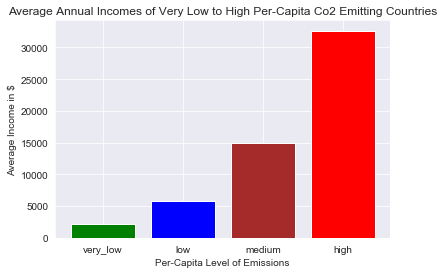

In [124]:
plt.bar(avg_income_ems.index, avg_income_ems, color = ['green', 'blue', 'brown', 'red'])
plt.title('Average Annual Incomes of Very Low to High Per-Capita Co2 Emitting Countries')
plt.xlabel('Per-Capita Level of Emissions')
plt.ylabel('Average Income in $');

Here we can clearly see that those countries with higher per-capita incomes are producing far more per-capita carbon emissions than other groups. A similar but more extreme pattern can be seen in electricity use: 

In [125]:
avg_elec_ems = df.groupby('emission_levels').electricity_use_pp.mean()
avg_elec_ems

emission_levels
very_low     113.215946
low          553.977712
medium      2546.935834
high        6198.238300
Name: electricity_use_pp, dtype: float64

Text(0, 0.5, 'Average Electricity Use in Kilowatt Hours')

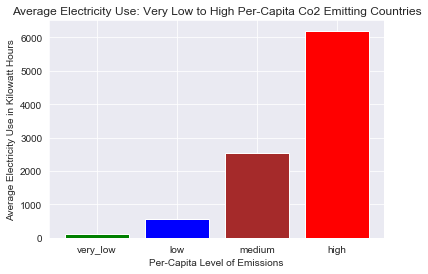

In [126]:
plt.bar(avg_elec_ems.index, avg_elec_ems,color = ['green', 'blue', 'brown', 'red'])
plt.title('Average Electricity Use: Very Low to High Per-Capita Co2 Emitting Countries')
plt.xlabel('Per-Capita Level of Emissions')
plt.ylabel('Average Electricity Use in Kilowatt Hours')

### Research Question 2  (How have particular countries' carbon emissions changed over time?)

Now I would like to compare different countries' per-capita emissions over time. I will firstly need to create subsets of the data to isolate particular countries. Then I can compare these visually in a line graph. 

In [127]:
df_uk = df[df.country == 'United Kingdom']
df_uk.head(10)

,country,Year,income_pp,electricity_use_pp,C02ems_pp,emission_levels
129,United Kingdom,1960,13800,2410.0,11.1,high
267,United Kingdom,1961,14000,2550.0,11.2,high
405,United Kingdom,1962,14000,2780.0,11.2,high
543,United Kingdom,1963,14500,3000.0,11.3,high
681,United Kingdom,1964,15200,3130.0,11.3,high
819,United Kingdom,1965,15400,3330.0,11.5,high
957,United Kingdom,1966,15600,3430.0,11.3,high
1095,United Kingdom,1967,15900,3510.0,10.8,high
1233,United Kingdom,1968,16500,3760.0,11.0,high
1371,United Kingdom,1969,16800,4010.0,11.3,high


In [128]:
df_us = df[df.country == 'United States']

In [129]:
df_bang = df[df.country =='Bangladesh']

In [130]:
df_chi = df[df.country=='China']

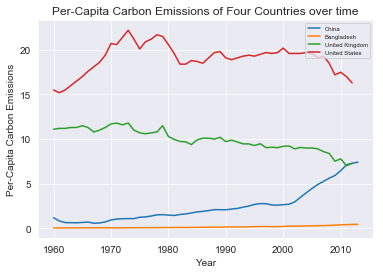

In [131]:
plt.plot('Year','C02ems_pp', data=df_chi, label ='China')
plt.plot('Year','C02ems_pp', data=df_bang, label = 'Bangladesh')
plt.plot('Year','C02ems_pp', data=df_uk, label= 'United Kingdom')
plt.plot('Year','C02ems_pp', data=df_us, label = 'United States')
plt.title('Per-Capita Carbon Emissions of Four Countries over time')
plt.xlabel('Year')
plt.ylabel('Per-Capita Carbon Emissions')
plt.legend(loc=1, prop={'size':6});

Another way to visualise this is to combine these subset dfs into one, then use facetgrid.

In [132]:
df_x = df[(df.country=='China') | (df.country=='United States') | (df.country=='United Kingdom') | (df.country=='Bangladesh')]
df_x.head(10)


,country,Year,income_pp,electricity_use_pp,C02ems_pp,emission_levels
9,Bangladesh,1960,1060,0.0,0.0459,very_low
23,China,1960,891,0.0,1.1900,low
129,United Kingdom,1960,13800,2410.0,11.1000,high
130,United States,1960,18100,4050.0,15.5000,high
147,Bangladesh,1961,1090,0.0,0.0462,very_low
161,China,1961,560,0.0,0.8260,low
267,United Kingdom,1961,14000,2550.0,11.2000,high
268,United States,1961,18200,4180.0,15.2000,high
285,Bangladesh,1962,1070,0.0,0.0494,very_low
299,China,1962,569,0.0,0.6480,low


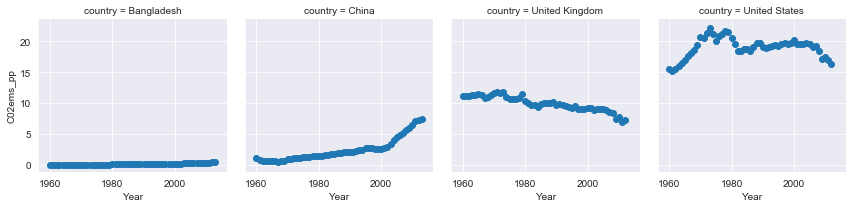

In [133]:
g = sns.FacetGrid(df_x, col='country')
g = g.map (plt.scatter, 'Year', 'C02ems_pp')


In both these visualisations we can detect a number of patterns:
1) Both the US (with by far the highest) and the UK have much higher per-capita emissions over the period.
2) The UK per-capita emissions seem to be reducing over this period, while the US are more erratic, but also seem to be falling after the year 2000.
3) China's emissions while relatively low from 1960-2000 rise sharply afterwards.
4) Bangladesh's per-capita emissions remain very low throughout.

These trends reflect a number of issues that are problematic in international climate change negotiations. Historically the developed world, including the US and Europe is responsibile for most of the cumulative carbon dioxide in the atmosphere. Yet countries like Bangladesh are being most severely affected by climate change now, while being the least responsible for it. This is sometimes referred to as the double injustice of climate change (Sovacool & Dworkin 2014). Secondly, the rise of China's per-capita emissions and the fall of the US and UK's are likely linked: it is hypothesised that both the US and UK have outsourced carbon intensive production to China and other developing countries, while still consuming products (Barrett et al 2013). This is sometimes referred to as the false accounting of emissions (by basing it on national production rather than final consumption). These injustices are background tensions to international climate change negotiations.   

### Research Question 3  (How might carbon emission profiles change in the future?)

This section will look at linear regressions of the above emissions profiles and the growth of electricity use, to consider how these level out over time and may continue in the future. 

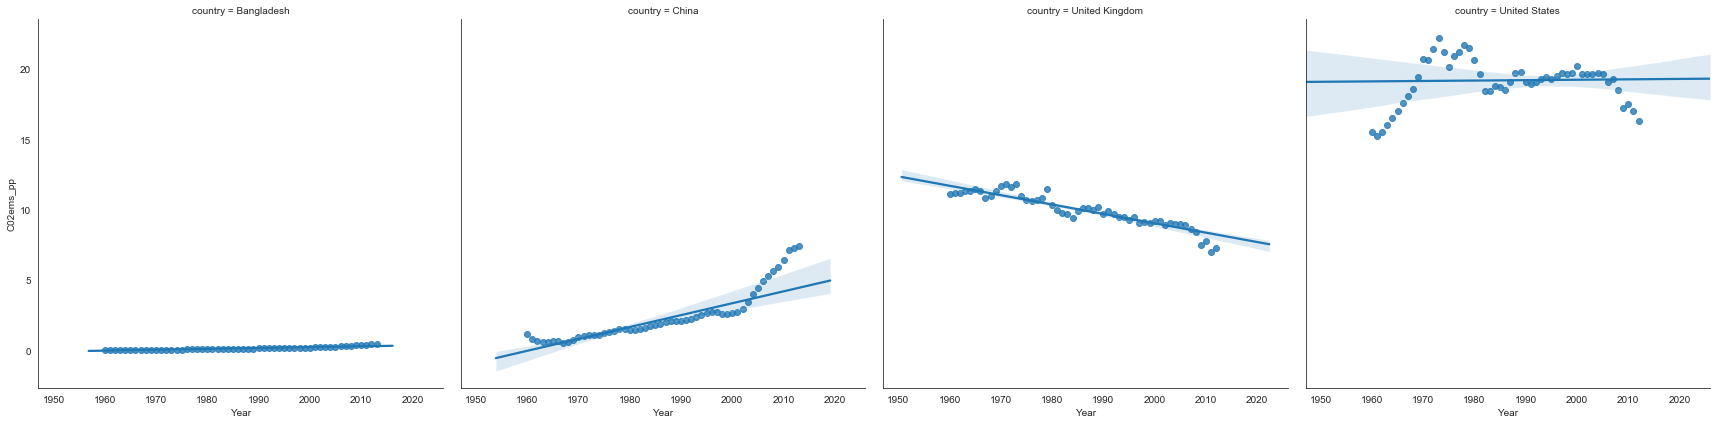

In [134]:
g = sns.set_style('white')
g = sns.lmplot(x='Year', y='C02ems_pp',
                      data =df_x,
                      height = 6,
                      robust =True,
                      palette='Set1',
                      col='country')

plt.show()

A considerably different pattern can be seen in the developed countries' electricity use per-capita.

In [ ]:
sns.set_style('white')
reglines = sns.lmplot(x='Year', y='electricity_use_pp',
                      data =df_x,
                      height = 7,
                      robust =True,
                      palette='Set1',
                      col='country')
plt.show()

The first group of graphs show worrying trends overall. The US per-capita emissions remain high compared to all, and do not appear to be falling, and even if they are not quickly enough. The UK's do seem to be on a more consistent downward trend but again not quickly enough. More worryingly, are the rise of China's per-capita emissions, which if not checked could make it very difficult to keep below 2 degrees centigrade average global warming. Again it should be emphasised that countries such as Bangladesh that are least responsible as shown above, are suffering the consequences of the climate crisis today and will be the worst effected in the coming years.  

The second group of graphs show a different possible dynamic. The UK and US show steady and strong growth in the use of per-capita electricity. This could be down to the large increase in consumer goods such as computers, smart phones and other household electrics over the 20th century. That this is going on at the same time as the UK's per-capita carbon emissions are falling and the United States' are stabilising could be down to two things: the growth of renewable energy generation in both the UK and US, and the outsourcing of production discussed above, where the embodied carbon dioxide is associated with the country that produces the product not the country where it is consumed.    


<a id='conclusions'></a>
## Conclusions

> Clearly, this data shows there are global injustices in terms of per-capita carbon emissions and income and the historical emissions over the years. The high emitting countries also use much more electricity. Linear modelling also suggests that carbon emissions are not falling quickly enough, and perhaps are merely being displaced. 

> Caution should be taken with per-capita figures, for as Chancel & Pickerty (2015) point out, their are many inequalities within countries and it is estimated that 10% of the population in both the developed and the developing world are responsible for over 50% of all total carbon dioxide emissions. This means that it is not only the richest countries that are the main cause of climate change, but that the richest 10% in these countries are the largest emitters. These inequalities and injustices within countries are occluded by per-capita data.     

> A limitations of this project was the use of 0 to replace the NaNs. This was rather crude and perhaps a more sophisticated method such as using a regression to create more nuanced figures could have been employed. A further limitation was bin grouping which was lowered somewhat by the use of 0 for the NaNs.   


# References

>Barrett, J., Peters, G., Wiedmann, T., Scott, K., Lenzen, M., Roelich, K. & Le Quere, C. 2013. Consump-tion-based GHG emission accounting: a UK case study. Climate Policy, 13, 451-470.

>Chancel, L. & Piketty, T. 2015. Carbon and inequality: from Kyoto to Paris. Paris School of Economics, 1-4.

>Sovacool, B. K. & Dworkin, M. H. 2014. Global energy justice, Cambridge University Press.

# Web Resources

https://www.gapminder.org/data/

https://docs.python.org/3/index.html

https://stackoverflow.com/


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [276]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0